In [55]:
import os.path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import matplotlib.ticker as mticker
from matplotlib.dates import HourLocator, DateFormatter,DayLocator,MonthLocator


from datetime import datetime

from pandas import read_csv


In [56]:
def make_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

In [57]:
def AnnualChart(x,year):
    xcopy = x.copy()
    title = "Meter Number " + str(xcopy.columns[1]) + " " + year

    plt.clf()
    plot = sns.lineplot(xcopy,x=xcopy.columns[0], y=xcopy.columns[1])

    plot.xaxis.set_major_locator(MonthLocator(interval=1))
    plot.xaxis.set_major_formatter(DateFormatter('%m-%d-%Y'))

    plt.title(title)
    plt.xlabel("Month")
    plt.ylabel("Power(kw)")
    plt.xticks(rotation='vertical')
    plt.tight_layout()
    sns.set_theme(style="whitegrid")

    make_dir(".\Charts\\Meter Number " +str(xcopy.columns[1])+ "\\Annual Usage")
    plt.savefig(".\Charts\\Meter Number " + str(xcopy.columns[1])+ "\\Annual Usage\\" + title + ".png")
    return

In [58]:
def MonthlyChart(x,month):
    xcopy = x.copy()
    title = "Meter Number " + str(xcopy.columns[1]) + " " + month.strftime("%m-%d-%Y")

    plt.clf()
    plot = sns.lineplot(xcopy,x=xcopy.columns[0], y=xcopy.columns[1])

    plot.xaxis.set_major_locator(DayLocator(interval=2))
    plot.xaxis.set_major_formatter(DateFormatter('%m-%d-%Y'))

    plt.title(title)
    plt.xlabel("Day")
    plt.ylabel("Power(kw)")
    plt.xticks(rotation='vertical')
    plt.tight_layout()
    sns.set_theme(style="whitegrid")

    make_dir(".\Charts\\Meter Number " +str(xcopy.columns[1])+ "\\Monthly Usage\\")
    plt.savefig(".\Charts\\Meter Number " +str(xcopy.columns[1])+ "\\Monthly Usage\\" + title + ".png")
    return

In [59]:
def DailyChart(x,day):
    xcopy = x.copy()
    title = "Meter Number " + str(xcopy.columns[1]) + " " + day.strftime("%m-%d-%Y")
    
    plt.clf()
    plot = sns.lineplot(xcopy,x=xcopy.columns[0], y=xcopy.columns[1])

    plot.xaxis.set_major_locator(HourLocator(interval=2))
    plot.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))

    plt.title(title)
    plt.xlabel("Hour")
    plt.ylabel("Power(kwph)")
    plt.xticks(rotation='vertical')
    plt.tight_layout()
    sns.set_theme(style="whitegrid")



    make_dir(".\Charts\\Meter Number " +str(xcopy.columns[1])+ "\\Daily Usage\\")

    plt.savefig(".\Charts\\Meter Number " +str(xcopy.columns[1])+ "\\Daily Usage\\" + title + ".png")
    return

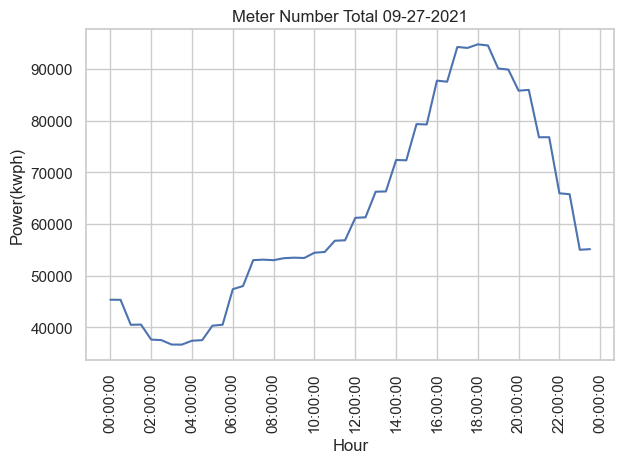

In [61]:
data = read_csv("2021-all-meter.csv", index_col= 0)

data['AMI Meter ID'] =  pd.to_datetime(data['AMI Meter ID'], format='%Y-%m-%d %H:%M:%S')
data['date'] =  pd.to_datetime(data['date'], format='%Y-%m-%d %H:%M:%S')

formated = data.copy()

formated['sd'] = formated['AMI Meter ID'].dt.date.copy()
#formated['ed'] = formated['date'].dt.date

formated['sm'] = [s.replace(day=1) for s in formated['AMI Meter ID'].dt.date].copy()
#formated['em'] = [e.replace(day=1) for e in formated['date'].dt.date]

for c in formated.select_dtypes(include=np.number).columns:
    Annual = formated[["sm",c]].groupby('sm',as_index = False).sum()
    AnnualChart(Annual,"2021")
    
    for m in formated["sm"].unique():
        Month = formated[["sm","sd",c]].groupby(["sm","sd"],as_index = False).sum().query("sm == @m")[["sd",c]]
        MonthlyChart(Month,m)
        
    for d in formated["sd"].unique():
        Daily = formated[['AMI Meter ID',"sd",c]].query("sd == @d")[["AMI Meter ID", c]]
        DailyChart(Daily,d)
    #AnnualChart(data)
    #for d in formated['sd'].unique():
    #    Day = formated.query("sm == " + str(d))
    #DailyChart()
    #MonthlyChart(data)